In [ ]:
!pip install fastf1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.0/122.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 14.2 MB/s eta 0:00:00


In [ ]:
import fastf1

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np

In [ ]:
# Load the data
session = fastf1.get_session(2023, 'Miami', 'Q')
session.load()

lap = session.laps.pick_fastest()
tel = lap.get_telemetry()

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: /root/.cache/fastf1.
	Size: 24.0 KB

DEFAULT CACHE ENABLED!
	Cache directory: /root/.cache/fastf1.
	Size: 24.0 KB
core           INFO 	Loading data for Miami Grand Prix - Qualifying [v3.1.2]
INFO:fastf1.fastf1.core:Loading data for Miami Grand Prix - Qualifying [v3.1.2]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fast

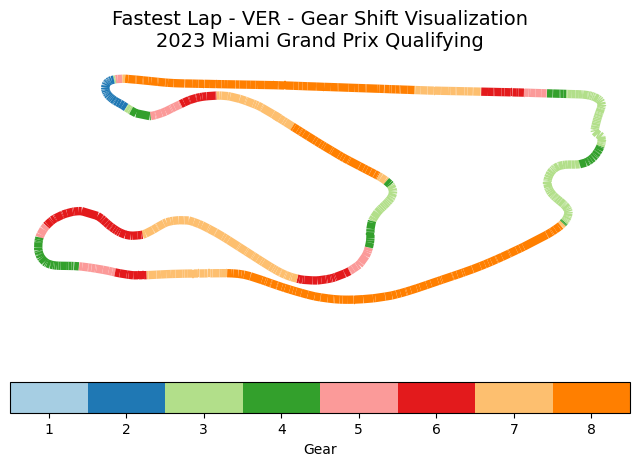

In [ ]:
# Where the car is at any moment in time ('x' n 'y' are columns in telemetry)
x = np.array(tel['X'].values)
y = np.array(tel['Y'].values)

# Create points, and with them, segments (converting it to the appropriate numpy data types)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = tel['nGear'].to_numpy().astype(float)

# Create a line collection (coloring the shape track). Set a segmented colormap and normalize the plot to integer values of colormap
colors = plt.get_cmap('Paired')
line_col = LineCollection(segments, norm=plt.Normalize(1, colors.N+1), cmap=colors, linewidth=6)
line_col.set_array(gear)

# Create the plot (circuit shape)
plt.figure(figsize=(8, 5))
plt.title(f"Fastest Lap - {lap['Driver']} - Gear Shift Visualization\n"
          f"{session.event.year} {session.event['EventName']} {session.name}", size=14)

plt.gca().add_collection(line_col)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
plt.axis('off')

# Add a colorbar to the plot. Change orientation depending on the track
lateral_bar = plt.colorbar(mappable=line_col, label="Gear", boundaries=np.arange(1, 10), orientation="horizontal")
lateral_bar.set_ticks(np.arange(1.5, 9.5))
lateral_bar.set_ticklabels(np.arange(1, 9))

#plt.savefig(f"/content/drive/MyDrive/F1/Gear_Shift_Visualization.png", dpi=500)

plt.show()